In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv('data/NO2.csv')

# STUDYING DATA

In [4]:
# SEPARATING DATA FROM LOCALISATION in 4 SECTORS
NO= data.loc[ (data.X<=data.X.mean()) & (data.Y>=data.Y.mean())]
NE = data.loc[ (data.X>data.X.mean()) & (data.Y>=data.Y.mean())]
SE= data.loc[ (data.X>data.X.mean()) & (data.Y<data.Y.mean())]
SO = data.loc[ (data.X<=data.X.mean()) & (data.Y<data.Y.mean())]

In [6]:
def plotAlldata( points, color):     
    """ plot Valeur = F(x) from input DATAFRAME with input color"""
    points.plot.scatter('X','Valeur',
                       c= color ,s=2,linewidths=0.5,edgecolor='k',alpha=0.5)

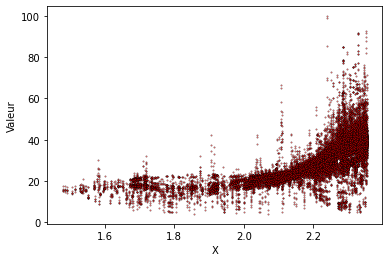

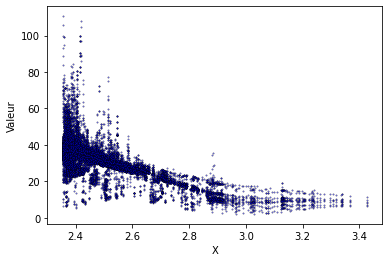

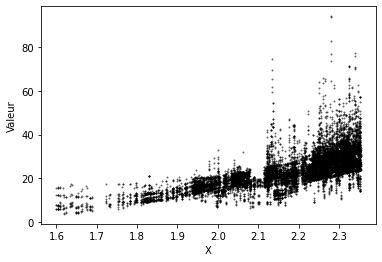

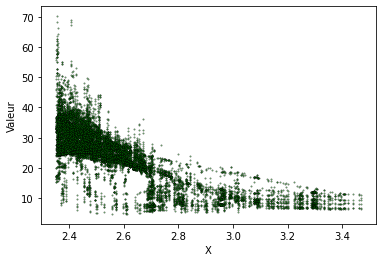

In [7]:
# PLOTS SHOW A BIT OF CORRELATION WITH VALUE AND X POSITION
# when far from mean, valeur is low
plotAlldata(NO,'r')
plotAlldata(NE,'b')
plotAlldata(SO,'k')
plotAlldata(SE,'g')

# LINEAR REGRESSION

In [11]:
# CREATE A LINEAR REGRESSION MODEL WITH STATS LIB

# search to explain variable VALEUR with 1 constant only , using SE dataset
model = smf.ols(formula='Valeur ~ 1',data=SE)

res1 = model.fit() # compute coefficient and constant to correspond to DATA
res1.params

Intercept    25.012925
dtype: float64

In [13]:
def plotModel(fit): 
    """ plot data  and plot prediction from input fit model"""
    plotAlldata(SE,'g')
    pp.scatter(SE.X, fit.predict(SE),
               c='r',s=10,linewidths=0.5,edgecolor='k',marker='D')

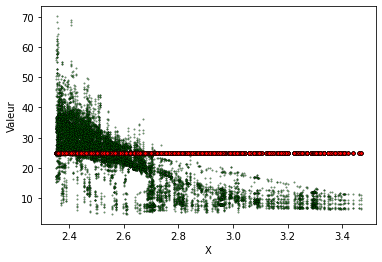

In [14]:
plotModel(res1)

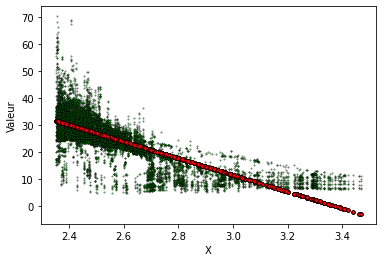

In [15]:
# TRY a second model with another approximation equation : X + constant
model2 = smf.ols(formula='Valeur ~ 1 + X',data=SE)
res2 = model2.fit()
plotModel(res2)

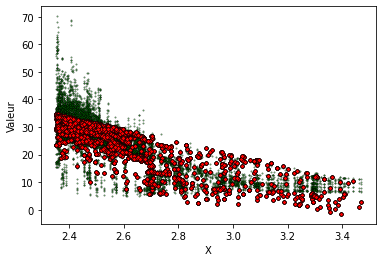

In [17]:
# TRY a second model with another approximation equation : X + Y + constant
# 2 VARIABLE TO EXPLAIN VALEUR
model3 = smf.ols(formula='Valeur ~ 1 + X + Y',data=SE)
res3 = model3.fit()
plotModel(res3)

In [18]:
res3.predict(SE)

50       34.298067
60       34.248870
81       34.169367
115      34.223563
165      34.390166
           ...    
75069    28.397307
75070    28.852131
75071    29.745028
75078    28.852131
75161    28.104007
Length: 15876, dtype: float64

# VALIDATE MODEL ?

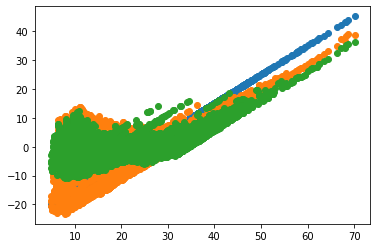

In [19]:
# USING METRICS TO EVALUATE OUR MODEL USEFULNESS

# METRICS RESIDUAL = DIFFERENCE BETWEEN REAL VALUE AND PREDICTED VALUES
pp.scatter(SE.Valeur,res1.resid)
pp.scatter(SE.Valeur,res2.resid)
pp.scatter(SE.Valeur,res3.resid)

In [20]:
# OTHER KIND OF METRICS

# MSE_resid (MEAN SQUARE EVALUATION) ( best tend to 0)
for model in [res1, res2,res3]:
    print(model.mse_resid)

79.48389287764921
31.635954503383722
14.62739055141701


In [21]:
# VARIANCE SQUARED (best tend to 1)
for model in [res1, res2,res3]:
    print(model.rsquared)

0.0
0.6020078969201136
0.815993565475291


In [ ]:
# F METRICS (best is highest)
for model in [res1, res2,res3]:
    print(model.fvalue )